# Exploratory stuff from 1st half of September

## Plot max expression angles for all genes

## Get angles for each time course point

## Scale each micro-array value with GTEX median tpm, for now, whole blood

## See distribution of how many genes vote for a given angle toward the value

In [73]:
# Read in the GTex Data pick tissue to use for normalization
#gtex paper: cite? https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4010069/
# https://gtexportal.org/home/datasets
# This file contains the median TPM by tissue. These medians were calculated directly from the file GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz.
# wget https://storage.googleapis.com/gtex_analysis_v7/rna_seq_data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct.gz
# for now, picking whole blood
import pandas as pd
tpm_df = pd.read_csv("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct", sep='\t')
gene_name_to_tpm_dict = dict()
for index, row in tpm_df.iterrows():
    gene_name_to_tpm_dict[row["Description"]] = row["Whole Blood"]


In [339]:
# Read in the micro-array data - so far only founds matches between 1230 genes in whitfield in the 56K genes from GTEX
# TODO - get better name mapping
import math
import numpy as np
count = 0
count_found = 0
whitfield_micro_array_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")

gene_names_with_micro_array_data = list()

time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()
gene_name_to_time_course_expressions_dict = dict()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    time_course_1_angles_list.append(((i/17.65)*2*math.pi)%(2*math.pi)) # 0 to 2pi
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    time_course_2_angles_list.append(((i/18.6)*2*math.pi)%(2*math.pi)) # 0 to 2pi
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    time_course_3_angles_list.append(((i/18)*2*math.pi)%(2*math.pi)) # 0 to 2pi
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    time_course_4_angles_list.append(((i/23.95)*2*math.pi + 2.3)%(2*math.pi)) # 0 to 2pi
    
for index, row in whitfield_micro_array_df.iterrows():
    count +=1
    name = str(row['NAME'])
    if (name != 'nan'):
        #print("___" + name + "___")
        names = name.split("^")
        if (len(names) > 1):
            #print("___" + names[1] + "___")
            gene_name = names[1].strip()
            if (gene_name in gene_name_to_tpm_dict and not(gene_name in gene_names_with_micro_array_data)):
                
                
                ####!!!! cut-off to have just a few top cycling genes
                scaled_fourier_score = float(row['Scaled Fourier'])
                #if (scaled_fourier_score < 10.0):
                 #   continue
                tpm = gene_name_to_tpm_dict[gene_name]
                #print(gene_name + " is found")
                gene_names_with_micro_array_data.append(gene_name)
                count_found += 1
                gene_name_to_time_course_expressions_dict[gene_name] = dict()
                gene_name_to_time_course_expressions_dict[gene_name]["one"] = list()
                
                
                new_row = row[11:31].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[11:31] = new_row
            
                new_row = row[32:56].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[32:56] = new_row
                
                new_row = row[57:81].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[57:81] = new_row
                
                new_row = row[82:105].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[82:105] = new_row
                
                #if(gene_name == "PITPNC1"):
                 #   print(row)
                
                for i in range(11,31):
                    gene_name_to_time_course_expressions_dict[gene_name]["one"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["two"] = list()
                for i in range(32,56):
                    gene_name_to_time_course_expressions_dict[gene_name]["two"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["three"] = list()
                for i in range(57,81):
                    gene_name_to_time_course_expressions_dict[gene_name]["three"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
                gene_name_to_time_course_expressions_dict[gene_name]["four"] = list()
                for i in range(82,105):
                    gene_name_to_time_course_expressions_dict[gene_name]["four"].append((2**row[i]) * tpm if row[i] else 0) # undo the log2 of data
    
                gene_name_to_time_course_expressions_dict[gene_name]["sine"] = row['Sin']
                gene_name_to_time_course_expressions_dict[gene_name]["cosine"] = row['Cos']
                gene_name_to_time_course_expressions_dict[gene_name]["phase"] = row['Phase'].strip()
print(count_found)
#print(gene_name_to_time_course_expressions_dict['KLF6'])

#print(gene_name_to_time_course_expressions_dict["PITPNC1"])

1230


In [174]:
# read in the single-cell data, and identify the set of genes that also have micro-array/tpm expression (1114)
# for each cell, get percentage of reads for each gene
# for the micro-array set, get percentage of "expression" for each gene
# for each gene, get the best match of percentages for each of the time-courses, and take an average angle
# then take the average angle of all the genes - that gives the phase
nestorova_df = pd.read_table("nestorawa_forcellcycle_expressionMatrix.txt.gz", compression='gzip', index_col = 0)

In [340]:
## subset micro-array and single-cell data for 1114 genes
count = 0
whitfield_subset_micro_array_df = pd.DataFrame(columns = range(0,91))
cell_cycle_genes_for_analysis = list()
for index, row in nestorova_df.iterrows():
    if index in gene_names_with_micro_array_data:
        count += 1
        gene_name = index
        cell_cycle_genes_for_analysis.append(gene_name)
        whitfield_subset_micro_array_df.loc[gene_name] = gene_name_to_time_course_expressions_dict[gene_name]["one"] + gene_name_to_time_course_expressions_dict[gene_name]["two"] + gene_name_to_time_course_expressions_dict[gene_name]["three"] + gene_name_to_time_course_expressions_dict[gene_name]["four"]
nestorova_subset_df = pd.DataFrame(nestorova_df.loc[cell_cycle_genes_for_analysis])
print(count)

1114


In [310]:
print(time_course_1_angles_list)
for gene_angle in time_course_1_angles_list:
    if (gene_angle <= 0):
        print(gene_angle)

[0.0, 0.7119756722016529, 1.4239513444033058, 2.1359270166049584, 2.8479026888066117, 3.559878361008264, 4.271854033209917, 4.98382970541157, 5.695805377613223, 0.1245957426352895, 0.8365714148369419, 1.5485470870385951, 2.2605227592402475, 2.9724984314419007, 3.684474103643554, 4.396449775845207, 5.1084254480468605, 5.820401120248514, 0.249191485270579, 0.9611671574722322]
0.0


In [341]:
# express each column as a percentage
whitfield_subset_micro_array_df = whitfield_subset_micro_array_df.div(whitfield_subset_micro_array_df.sum(axis=0))
nestorova_subset_df = nestorova_subset_df.div(nestorova_subset_df.sum(axis=0))
#print(nestorova_subset_df)

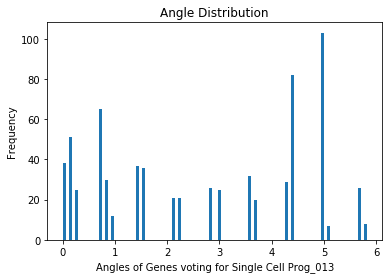

In [342]:
# process 1st cell
cell_name = "Prog_013"
all_genes_angle_list = list()
all_genes_sine_sum = 0
all_genes_cosine_sum = 0
count = 0
for gene_name in cell_cycle_genes_for_analysis:
    expression_scRNA = nestorova_subset_df[cell_name][gene_name]
    if (not expression_scRNA): # no reads in single cell, do not consider
        continue
    
    #if (gene_name == 'PITPNC1'):
     #   print(whitfield_subset_micro_array_df.loc[gene_name])
    
    # process the first time course
    best_diff_1 = math.inf
    best_angle_1 = -1
    for i in range(0, 20):
        diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+0] - expression_scRNA)
        if (diff < best_diff_1 and (whitfield_subset_micro_array_df.loc[gene_name][i+0] != 0)):
            best_diff_1 = diff
            best_angle_1 = time_course_1_angles_list[i]
    
    # TODO:
    if (best_angle_1 == -1):  # TODO: deal with things here - expand to other time courses perhaps
            continue
            
        
    #print(whitfield_subset_micro_array_df.loc[gene_name])
    #print(best_diff_1)
    #print(best_angle_1)
    # process the second time course
    best_diff_2 = math.inf
    best_angle_2 = -1
    for i in range(0, 24):
        diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+20] - expression_scRNA)
        if (diff < best_diff_2 and (whitfield_subset_micro_array_df.loc[gene_name][i+20] != 0)):
            best_diff_2 = diff
            best_angle_2 = time_course_2_angles_list[i]
            
    #print(whitfield_subset_micro_array_df.loc[gene_name][20:44])
    #print(best_diff_2)
    #print(best_angle_2)
    # process the third time course
    best_diff_3 = math.inf
    best_angle_3 = -1
    for i in range(0, 24):
        diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+44] - expression_scRNA)
        if (diff < best_diff_3):
            best_diff_3 = diff
            best_angle_3 = time_course_3_angles_list[i]
    #print(whitfield_subset_micro_array_df.loc[gene_name][44:68])
    #print(best_diff_3)
    #print(best_angle_3)
    # process the first time course
    best_diff_4 = math.inf
    best_angle_4 = -1
    for i in range(0, 23):
        diff = abs(whitfield_subset_micro_array_df.loc[gene_name][i+68] - expression_scRNA)
        if (diff < best_diff_4):
            best_diff_4 = diff
            best_angle_4 = time_course_4_angles_list[i]
    #print(whitfield_subset_micro_array_df.loc[gene_name][68:91])
    #print(best_diff_4)
    #print(best_angle_4)
    
    #print(gene_name)
    count += 1
    #print(expression_scRNA)
    
    sin_sum = math.sin(best_angle_1) + math.sin(best_angle_2) + math.sin(best_angle_3) + math.sin(best_angle_4)
    cos_sum = math.cos(best_angle_1) + math.cos(best_angle_2) + math.cos(best_angle_3) + math.cos(best_angle_4)
    average_gene_angle = math.atan2(sin_sum, cos_sum)
    
    #TRY - just the first time course
    average_gene_angle = best_angle_1
    
    #print(average_gene_angle)
    all_genes_sine_sum += math.sin(average_gene_angle)
    all_genes_cosine_sum += math.cos(average_gene_angle)
    all_genes_angle_list.append(average_gene_angle)
    #print(average_gene_angle)
    #if (count >3):
    #    break
import matplotlib.pyplot as plt
plt.hist(all_genes_angle_list, bins=100)
plt.xlabel('Angles of Genes voting for Single Cell ' + cell_name)
plt.ylabel('Frequency')
plt.title('Angle Distribution')
plt.show()

In [343]:
all_gene_angle = math.atan2(all_genes_sine_sum, all_genes_cosine_sum)
print(all_gene_angle)

-0.4454148518479385


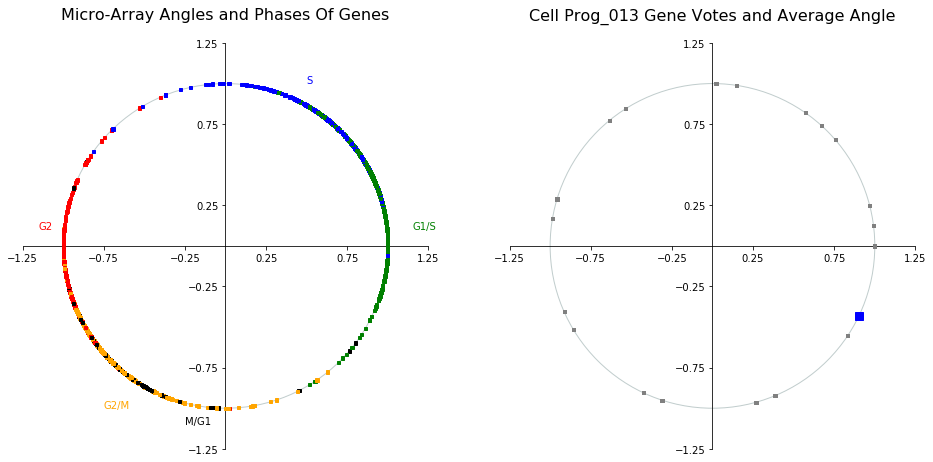

In [345]:
#print(whitfield_subset_micro_array_df)
#print(whitfield_subset_micro_array_df.sum(axis=0))
from pylab import *
figure(figsize=(16,8))
ax=subplot(121, aspect='equal')

#### All Genes

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))
ax.yaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))

#plot one circle (the biggest one on bottom-right)
# now make a circle with no fill, which is good for hi-lighting key results
circle = Circle((0, 0), 1.0, color='#C1CDCD', fill=False)
ax.add_artist(circle)
#circles(1, 0, 0.5, 'r', alpha=0.2, lw=5, edgecolor='b', transform=ax.transAxes)

#plot a set of circles (circles in diagonal)
#a=arange(11)
#out = circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')

# Create a Rectangle patches
for gene_name in cell_cycle_genes_for_analysis:
    use_color = 'gray'
    if (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G1/S'):
        use_color = 'green'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'S'):
        use_color = 'blue'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2'):
        use_color = 'red'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'G2/M'):
        use_color = 'orange'
    elif (gene_name_to_time_course_expressions_dict[gene_name]["phase"] == 'M/G1'):
        use_color = 'black'
    rect = Rectangle((gene_name_to_time_course_expressions_dict[gene_name]["cosine"]-0.01,gene_name_to_time_course_expressions_dict[gene_name]["sine"]-0.01),0.02,0.02,linewidth=1,edgecolor=use_color,facecolor=use_color,zorder=9)
    # Add the patch to the Axes
    ax.add_patch(rect)
    
text(1.15, 0.1, "G1/S", color='green')
text(0.5, 1, "S", color='blue')
text(-1.15, 0.1, "G2", color='red')
text(-0.75, -1, "G2/M", color='orange')
text(-0.25, -1.1, "M/G1", color='black')

title("Micro-Array Angles and Phases Of Genes\n", fontsize=16)

##########
# Now the Selected Cell

ax=subplot(122, aspect='equal')

#### All Genes

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))
ax.yaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))

#plot one circle (the biggest one on bottom-right)
# now make a circle with no fill, which is good for hi-lighting key results
circle = Circle((0, 0), 1.0, color='#C1CDCD', fill=False)
ax.add_artist(circle)
#circles(1, 0, 0.5, 'r', alpha=0.2, lw=5, edgecolor='b', transform=ax.transAxes)

#plot a set of circles (circles in diagonal)
#a=arange(11)
#out = circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')

# Create a Rectangle patches
for angle in all_genes_angle_list:
    #print(angle)
    rect = Rectangle((math.cos(angle)-0.01,math.sin(angle)-0.01),0.02,0.02,linewidth=1,edgecolor='gray',facecolor='gray',zorder=9)
    # Add the patch to the Axes
    #print(math.cos(angle))
    ax.add_patch(rect)

# add the computed average angle
rect = Rectangle((math.cos(all_gene_angle)-0.025,math.sin(all_gene_angle)-0.025),0.05,0.05,linewidth=1,edgecolor='blue',facecolor='blue',zorder=10)
# Add the patch to the Axes
ax.add_patch(rect)

title("Cell " + cell_name + " Gene Votes and Average Angle\n", fontsize=16)

xlim(-1.25,1.25)
ylim(-1.25, 1.25)

show()
